Please enter the file name containing properties: cur1.txt
enter water exponent
Enter number :3.72
n= 3.72
enter oil exponenet
Enter number :2.56
m= 2.56
    index     Sw       SwD        fw    Secant  derivative_fw
0     151  0.665  0.699074  0.899095  2.977137       2.904059
1     152  0.667  0.703704  0.904776  2.976238       2.777405
2     153  0.669  0.708333  0.910207  2.974533       2.654129
3     154  0.671  0.712963  0.915395  2.972062       2.534304
4     155  0.673  0.717593  0.920347  2.968860       2.417983
..    ...    ...       ...       ...       ...            ...
60    211  0.785  0.976852  0.999955  2.369560       0.012044
61    212  0.787  0.981481  0.999975  2.358431       0.008299
62    213  0.789  0.986111  0.999988  2.347390       0.005171
63    214  0.791  0.990741  0.999996  2.336439       0.002681
64    215  0.793  0.995370  0.999999  2.325580       0.000888

[65 rows x 6 columns]
Slope = 2.977136731501147
Swbt = 0.6650000000000003
        Sw       SwD       

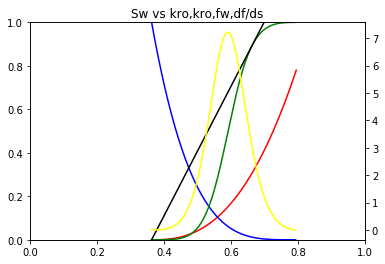

      Sw2      SwD2       fw2      fwo2  derivative_fw2   avg Sw2         Qi  \
0   0.665  0.699074  0.899095  0.100905        2.904059  0.699746   0.344346   
1   0.675  0.722222  0.925069  0.074931        2.305204  0.707505   0.433801   
2   0.685  0.745370  0.945495  0.054505        1.794709  0.715370   0.557193   
3   0.695  0.768519  0.961253  0.038747        1.370827  0.723266   0.729486   
4   0.705  0.791667  0.973177  0.026823        1.026444  0.731132   0.974237   
5   0.715  0.814815  0.982014  0.017986        0.751846  0.738922   1.330059   
6   0.725  0.837963  0.988411  0.011589        0.536606  0.746596   1.863566   
7   0.735  0.861111  0.992911  0.007089        0.370715  0.754123   2.697489   
8   0.745  0.884259  0.995960  0.004040        0.245187  0.761477   4.078517   
9   0.755  0.907407  0.997923  0.002077        0.152303  0.768636   6.565877   
10  0.765  0.930556  0.999094  0.000906        0.085662  0.775582  11.673737   
11  0.775  0.953704  0.999707  0.000293 

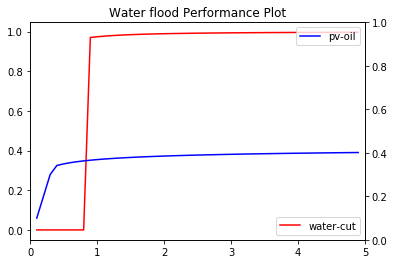

Plots saturation Profile
Enter pore volume of water Injected? 0.2
      Sw2  fraction_of_x
0   0.665       0.580812
1   0.675       0.461041
2   0.685       0.358942
3   0.695       0.274165
4   0.705       0.205289
5   0.715       0.150369
6   0.725       0.107321
7   0.735       0.074143
8   0.745       0.049037
9   0.755       0.030461
10  0.765       0.017132
11  0.775       0.008032
12  0.785       0.002409
<class 'pandas.core.frame.DataFrame'>
0.5808117278299756
[0.58081173 0.58081173 0.58081173 0.58081173 0.58081173 0.58081173
 0.58081173 0.58081173 0.58081173 0.58081173]
y1= [0.363      0.39655556 0.43011111 0.46366667 0.49722222 0.53077778
 0.56433333 0.59788889 0.63144444 0.665     ]


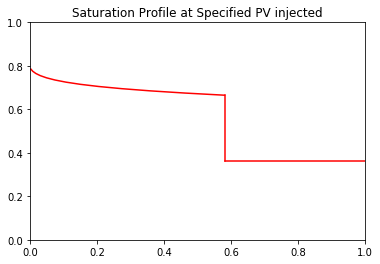

In [2]:
# Copy and paste the input value
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.interpolate import interp1d as inp
#inputs
prop = input("Please enter the file name containing properties: ")
inp1 = open(prop, "r")
line1 = inp1.readline()
line1 = line1.rstrip()
tokens1 = line1.split()
mu_oil = float(tokens1[0])					# oil   viscoscity
mu_water = float(tokens1[1])				# water viscoscity 
Swi= float(tokens1[2])						# Initial Water saturation
Sor = float(tokens1[3])						# Residul Oil saturation
alpha1 = float(tokens1[4])					# kroe
alpha2 = float(tokens1[5])					# krwe
inp1.close()                                  
print('enter water exponent')
n1 = input ("Enter number :")
n= float(n1)
print('n=',n)
print('enter oil exponenet')
m1 =  input ("Enter number :")
m= float(m1)
print('m=',m)


qw_injection=338
Bo=1.25
Bw=1.02                                            
                                        
A = (alpha1*mu_water)/(alpha2*mu_oil)
B = 1/(1-Sor-Swi)

 
 # Calculation for slope and breakthrough saturation
df = pd.DataFrame()
ros = 1-Sor
stepover = 0.002
for i in np.arange (Swi,ros,stepover):
  df = df.append({'Sw':i}, ignore_index = True) 
df['SwD'] = (df['Sw']-Swi)/(ros-Swi)
df['fw'] = (df['SwD']**n)/(df['SwD']**n+A*(1-df['SwD'])**m)
df['Secant'] = (df['fw'])/(df['Sw']-Swi)
df['derivative_fw'] = (A*B*((n*df['SwD']**(n-1)*(1-df['SwD'])**m)+(m*df['SwD']**n*(1-df['SwD'])**(m-1))))/(df['SwD']**n+A*(1-df['SwD'])**m)**2
result_df= df.loc[df['Secant']>=df['derivative_fw']]
result_df = result_df.reset_index()
print(result_df)
slope = result_df['Secant'].iloc[0]
Swbt = result_df['Sw'].iloc[0]
print('Slope =',slope)
print('Swbt =',Swbt)


#For Fractional flow curve
df1 = pd.DataFrame()
ros = 1-Sor
stepover = 0.002
for i in np.arange (Swi,ros,stepover):
  df1 = df1.append({'Sw':i}, ignore_index = True) 
df1['SwD'] = (df1['Sw']-Swi)/(ros-Swi)
df1['kro'] = alpha1*(1-df1['SwD'])**n
df1['krw'] = alpha2*(df1['SwD'])**m
df1['fw'] = (df1['SwD']**n)/(df1['SwD']**n+A*(1-df1['SwD'])**m)
df1['derivative_fw'] = (A*B*((n*df1['SwD']**(n-1)*(1-df1['SwD'])**m)+(m*df1['SwD']**n*(1-df1['SwD'])**(m-1))))/(df1['SwD']**n+A*(1-df1['SwD'])**m)**2
df1['Tangent']= (df1['Sw']-Swi)*slope
pd.set_option('display.max_columns', None)
print(df1)
 #For plot of fractional flow Curve
fig,ax = plt.subplots()
ax.plot(df1.Sw, df1.krw, color = 'red',label = 'krw')
ax.plot(df1.Sw, df1.kro, color = 'blue', label = 'kro')
ax.plot(df1.Sw, df1.fw, color = 'green', label = 'fw')
ax.plot(df1.Sw, df1.Tangent, color = 'Black', label = 'Tangent')
plt.ylim(0,1)
plt.xlim(0,1)
ax2 = ax.twinx()
ax2.plot(df1.Sw, df1.derivative_fw, color = 'yellow', label = 'df/ds')
plt.xlim(0,1)
plt.title('Sw vs kro,kro,fw,df/ds')
plt.show()




#After breakthrough Calculation
df2 = pd.DataFrame()
ros = 1-Sor
stepover = 0.01
for i in np.arange (Swbt,ros,stepover):
  df2 = df2.append({'Sw2':i}, ignore_index = True) 
df2['SwD2'] = (df2['Sw2']-Swi)/(ros-Swi)
df2['fw2'] = (df2['SwD2']**n)/(df2['SwD2']**n+A*(1-df2['SwD2'])**m)
df2['fwo2'] = 1-df2['fw2']
df2['derivative_fw2'] = (A*B*((n*df2['SwD2']**(n-1)*(1-df2['SwD2'])**m)+(m*df2['SwD2']**n*(1-df2['SwD2'])**(m-1))))/(df2['SwD2']**n+A*(1-df2['SwD2'])**m)**2
df2['avg Sw2'] =  df2['Sw2'] + ((1-df2['fw2'])/df2['derivative_fw2'])
df2['Qi'] = 1/df2['derivative_fw2']
df2['Np'] = (df2['avg Sw2']-Swi)
df2['WORs'] = (df2['fw2']/(1-df2['fw2']))
pd.set_option('display.max_columns',None)
print(df2)
#Plot of time vs oil rate, oil produced 
#fig,ax = plt.subplots()
#ax.plot(df2.Qi, df2.fw2, color = 'red',label = 'water-cut')
#plt.legend()
#ax2 = ax.twinx()
#ax2.plot(df2.Qi, df2.Np, color = 'blue',label ='pv-oil')
#plt.xlim(0,5)
#plt.ylim(0,1)
#plt.legend()
#plt.title('Time vs Np, fw')
#plt.show()
x=df2['Qi']
y=df2['Np']
z=df2['fw2']
f=inp(x,y,kind='cubic')
f1=inp(x,z,kind='cubic')
df3=pd.DataFrame()  
for i in np.arange(0.1,5,0.1):
    df3=df3.append({'Qi':i}, ignore_index=True)
    df3['PVO']=[f(c) if c>df2.iloc[0]['Qi'] else c for c in df3.Qi] 
    df3['PVO']=df3['PVO'].astype(float)
    df3['PVO']=df3['PVO'].round(decimals=5)
    df3['WC']=[f1(c) if c>df2.iloc[0]['fw2'] else 0 for c in df3.Qi]
    df3['WC']=df3['WC'].astype(float)
    df3['WC']=df3['WC'].round(decimals=5)
print('Interpolated Values of running case print df3')
print(df3) 
fig,ax = plt.subplots()
ax.plot(df3.Qi, df3.WC, color = 'red',label = 'water-cut')
plt.legend()
ax2 = ax.twinx()
ax2.plot(df3.Qi, df3.PVO, color = 'blue',label ='pv-oil')
plt.xlim(0,5)
plt.ylim(0,1)
plt.legend()
plt.title('Water flood Performance Plot')
plt.show()

#Calculation for Saturation profile
print('Plots saturation Profile')
PV = float (input('Enter pore volume of water Injected? '))
df3 = pd.DataFrame({'Sw2':df2['Sw2']})
df3['fraction_of_x'] =  PV*df2['derivative_fw2']
print(df3)
print(type(df3))
#print('df3[0]=',df3[0])
x11=df3['fraction_of_x'].values
print(x11[0])
x1=np.linspace(x11[0],x11[0],10)
y1=np.linspace(Swi,Swbt,10)
x2=np.linspace(x11[0],1.0,10)
y2=np.linspace(Swi,Swi,10)
print(x1)
print('y1=',y1)
#Plot of Saturation profile
fig,ax = plt.subplots()
ax.plot(df3.fraction_of_x, df3.Sw2, color = 'red')
ax.plot(x1,y1,color='red')
ax.plot(x2,y2,color='red')
plt.xlim(0,1)
plt.ylim(0,1)
plt.title('Saturation Profile at Specified PV injected')
plt.show()